In [1]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
!ls ../data/

indianapines_gt.npy  indianapines.npy  salinas_gt.npy  salinas.npy


In [3]:
indiana_img = np.load('../data/indianapines.npy')
indiana_labels = np.load('../data/indianapines_gt.npy')

In [4]:
indiana_img.shape

(145, 145, 200)

In [5]:
indiana_labels.shape

(145, 145)

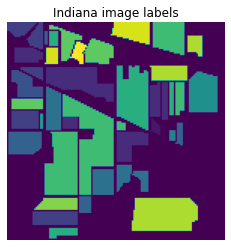

In [6]:
plt.imshow(indiana_labels)
plt.axis('off')
plt.title('Indiana image labels')
plt.show()

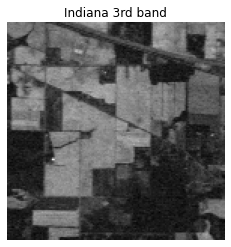

In [7]:
plt.imshow(indiana_img[:, :, 150], cmap='gray')
plt.axis('off')
plt.title('Indiana 3rd band')
plt.show()

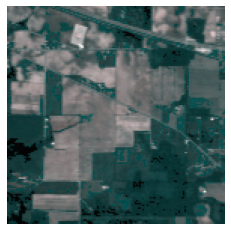

In [8]:
sp.imshow(indiana_img, (22, 15, 15))
plt.axis('off')
plt.show()

In [9]:
indiana_img[0, 0]

array([3172, 4142, 4506, 4279, 4782, 5048, 5213, 5106, 5053, 4750, 4816,
       4769, 4610, 4805, 4828, 4861, 4767, 4624, 4549, 4463, 4462, 4446,
       4445, 4336, 4381, 4319, 4207, 4305, 4311, 3991, 4168, 3942, 4061,
       4362, 4318, 4252, 4869, 5284, 5055, 3591, 5175, 5217, 5058, 4969,
       4721, 4291, 4555, 4886, 4868, 4806, 4783, 4811, 4709, 3903, 3795,
       3715, 2591, 2130, 2269, 2480, 3145, 3626, 4060, 4296, 4211, 4225,
       4157, 4133, 4082, 4048, 3935, 3843, 3784, 3642, 3271, 2707, 1707,
       1564, 1838, 1719, 2229, 2764, 2919, 2873, 2977, 2913, 3034, 3051,
       3124, 3101, 3033, 2713, 2740, 2947, 2706, 2834, 2856, 2683, 2400,
       2229, 1822, 1542, 1097, 1047, 1069, 1100, 1122, 1259, 1365, 1261,
       1374, 1630, 1851, 2028, 2130, 2170, 2205, 2214, 2204, 2100, 2106,
       2146, 2089, 2078, 2134, 2127, 2074, 2057, 2045, 2003, 1999, 1959,
       1924, 1883, 1843, 1781, 1716, 1698, 1645, 1540, 1410, 1294, 1131,
       1044, 1032, 1045, 1100, 1212, 1295, 1244, 11

In [10]:
## scale pixels

## min max scaler
mins = indiana_img.min(axis=-1)
maxs = indiana_img.max(axis=-1)

In [11]:
mins

array([[1020, 1020, 1016, ..., 1015, 1018, 1016],
       [1006, 1015, 1015, ..., 1015, 1012, 1016],
       [1022, 1011, 1010, ..., 1010, 1020, 1011],
       ...,
       [ 996, 1008,  997, ...,  996,  997, 1000],
       [1000,  991, 1002, ..., 1003,  998, 1000],
       [1000,  990,  997, ..., 1000, 1001, 1000]], dtype=uint16)

In [12]:
def stackn(arr, n):
    # Stack n numpy arrays deepwise
    l = [None] * n
    for i in range(n):
        l[i] = arr.copy()
    return np.stack(l, axis=2)

In [13]:
mins = stackn(mins, 200)
maxs = stackn(maxs, 200)

In [14]:
mins.shape

(145, 145, 200)

In [15]:
maxs.shape

(145, 145, 200)

In [16]:
scaled_img = (indiana_img - mins) / (maxs - mins)

In [17]:
scaled_img.shape

(145, 145, 200)

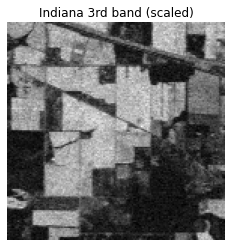

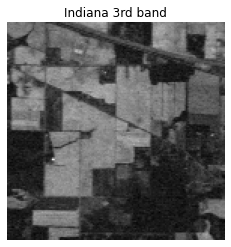

In [18]:
plt.imshow(scaled_img[:, :, 150], cmap='gray')
plt.axis('off')
plt.title('Indiana 3rd band (scaled)')
plt.show()
plt.imshow(indiana_img[:, :, 150], cmap='gray')
plt.axis('off')
plt.title('Indiana 3rd band')
plt.show()

In [19]:
np.unique(indiana_labels.flatten())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

In [20]:
scaled_img.shape

(145, 145, 200)

In [21]:
train_data = scaled_img.reshape((scaled_img.shape[0] * scaled_img.shape[1], scaled_img.shape[-1]))

In [22]:
train_data.shape

(21025, 200)

In [25]:
# model
model = KMeans(n_clusters=17, verbose=1)

In [27]:
model.fit(train_data)

Initialization complete
Iteration 0, inertia 4025.714605805616
Iteration 1, inertia 2810.126275538725
Iteration 2, inertia 2725.5287615442135
Iteration 3, inertia 2673.480248298357
Iteration 4, inertia 2642.091215969933
Iteration 5, inertia 2619.887152734599
Iteration 6, inertia 2603.4664517983383
Iteration 7, inertia 2592.779185654647
Iteration 8, inertia 2586.5431612740076
Iteration 9, inertia 2582.8545933775085
Iteration 10, inertia 2580.440784393117
Iteration 11, inertia 2578.9188826595323
Iteration 12, inertia 2577.889055137869
Iteration 13, inertia 2576.871013124833
Iteration 14, inertia 2576.0317538530803
Iteration 15, inertia 2575.4732795241903
Iteration 16, inertia 2575.0934042830745
Iteration 17, inertia 2574.814499444321
Iteration 18, inertia 2574.5824698036927
Iteration 19, inertia 2574.3751968786187
Iteration 20, inertia 2574.2438475307176
Iteration 21, inertia 2574.1192044580616
Iteration 22, inertia 2574.0310084498406
Iteration 23, inertia 2573.961456522715
Iteration 24,

Iteration 9, inertia 2533.9654804561787
Iteration 10, inertia 2531.3768023327434
Iteration 11, inertia 2529.0061586347747
Iteration 12, inertia 2527.1917580431386
Iteration 13, inertia 2525.772068645291
Iteration 14, inertia 2524.5687984750425
Iteration 15, inertia 2523.5619713977812
Iteration 16, inertia 2522.777131625395
Iteration 17, inertia 2522.208619831488
Iteration 18, inertia 2521.740156982718
Iteration 19, inertia 2521.5126166833115
Iteration 20, inertia 2521.3510886022837
Iteration 21, inertia 2521.2120540956703
Iteration 22, inertia 2521.105258998878
Iteration 23, inertia 2521.009712113787
Iteration 24, inertia 2520.8919630482987
Iteration 25, inertia 2520.8322139370885
Iteration 26, inertia 2520.7902425422803
Iteration 27, inertia 2520.755039855101
Iteration 28, inertia 2520.7281895349556
Iteration 29, inertia 2520.7169822961127
Iteration 30, inertia 2520.7023009060053
Iteration 31, inertia 2520.690106133637
Iteration 32, inertia 2520.67599749562
Iteration 33, inertia 2520.

Iteration 26, inertia 2526.757541879795
Iteration 27, inertia 2526.379316872498
Iteration 28, inertia 2526.1412375026284
Iteration 29, inertia 2525.9366737472214
Iteration 30, inertia 2525.732069106022
Iteration 31, inertia 2525.5815362480585
Iteration 32, inertia 2525.364334148681
Iteration 33, inertia 2525.0728780223253
Iteration 34, inertia 2524.713155556415
Iteration 35, inertia 2524.348408313277
Iteration 36, inertia 2523.9403954351055
Iteration 37, inertia 2523.575976796651
Iteration 38, inertia 2523.2686552615805
Iteration 39, inertia 2523.0074038037524
Iteration 40, inertia 2522.8660192204065
Iteration 41, inertia 2522.7631749965867
Iteration 42, inertia 2522.615805125958
Iteration 43, inertia 2522.4817275383225
Iteration 44, inertia 2522.344079924487
Iteration 45, inertia 2522.207742810039
Iteration 46, inertia 2522.0979862704858
Iteration 47, inertia 2521.9627358387875
Iteration 48, inertia 2521.831429779113
Iteration 49, inertia 2521.7350624490136
Iteration 50, inertia 2521.

Iteration 53, inertia 2520.37198166505
Iteration 54, inertia 2520.3422373788103
Iteration 55, inertia 2520.316181833077
Iteration 56, inertia 2520.290369583476
Iteration 57, inertia 2520.2794450967253
Iteration 58, inertia 2520.268190313073
Iteration 59, inertia 2520.255945244605
Iteration 60, inertia 2520.234027416059
Iteration 61, inertia 2520.2090528373965
Iteration 62, inertia 2520.1941463626636
Iteration 63, inertia 2520.1879731987747
Iteration 64, inertia 2520.1753990377642
Iteration 65, inertia 2520.1507886152567
Iteration 66, inertia 2520.1402539928436
Iteration 67, inertia 2520.132049292401
Iteration 68, inertia 2520.126518012523
Iteration 69, inertia 2520.118197471177
Iteration 70, inertia 2520.1090702676374
Iteration 71, inertia 2520.100896413074
Iteration 72, inertia 2520.091903092072
Iteration 73, inertia 2520.0852343441343
Iteration 74, inertia 2520.0799586819253
Iteration 75, inertia 2520.0767317905975
Iteration 76, inertia 2520.0740639317833
Iteration 77, inertia 2520.0

KMeans(n_clusters=17, verbose=1)

In [29]:
model.labels_

array([8, 3, 3, ..., 1, 1, 1], dtype=int32)

In [30]:
results = model.labels_.copy()
results = results.reshape((scaled_img.shape[0], scaled_img.shape[1]))

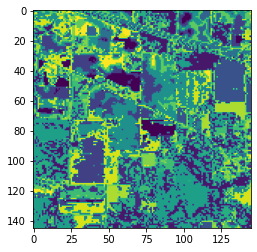

In [31]:
plt.imshow(results)
plt.show()